In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
df = pd.read_csv('Cleaned Data Test7.csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,New_User_Score,years_since_release,Developer_clas,Derived_global_sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,1,10.0,1,1
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,1,8.0,1,1
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,1,7.0,1,1
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,1,10.0,1,1
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,0,10.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6885,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M,1,14.0,0,0
6886,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M,1,2.0,0,0
6887,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T,0,5.0,0,0
6888,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,12.0,7.2,13.0,SimBin,E10+,1,5.0,0,0


In [3]:
#df.dropna(subset=['years_since_release'], inplace=True)

# Print the resulting dataframe
#df

# Taking Global Sales as Response Variable

In [4]:
# Split the data into features (X) and target (y)
x1 = df['User_Score']
x2 = df['years_since_release']
x3 = df['Developer_clas']
x4 = df['Critic_Score']
X = pd.concat([x1, x2, x3, x4], axis = 1).reindex(x1.index) 
y = df['Derived_global_sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
y_pred = rf.predict(X_test)

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6574746008708273


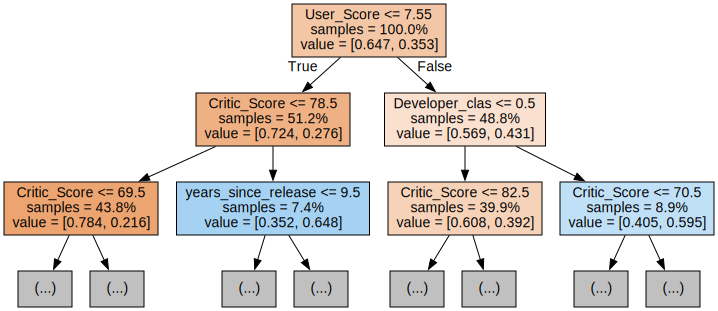

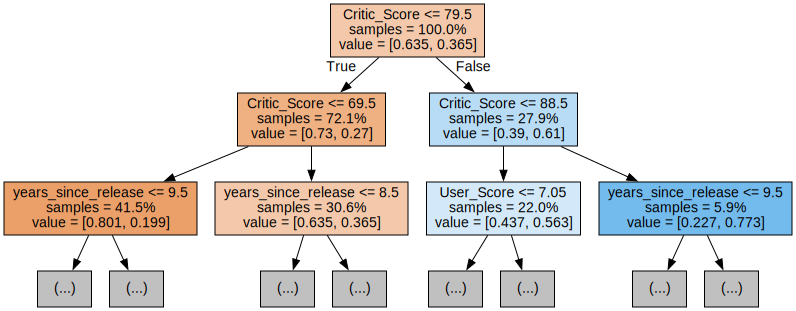

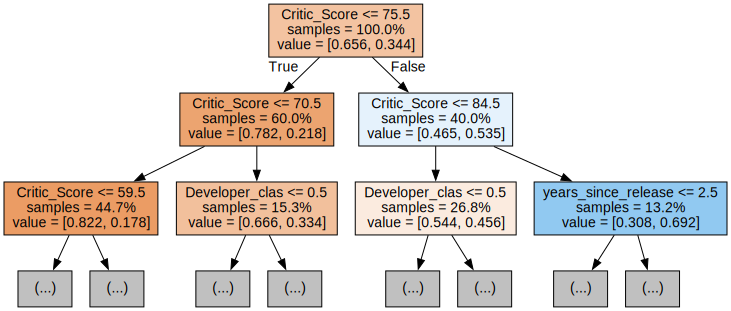

In [8]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

False Positive Rate: 0.22696629213483147
True Positive Rate: 0.44672131147540983
True Negative Rate: 0.7730337078651686
False Negative Rate: 0.5532786885245902


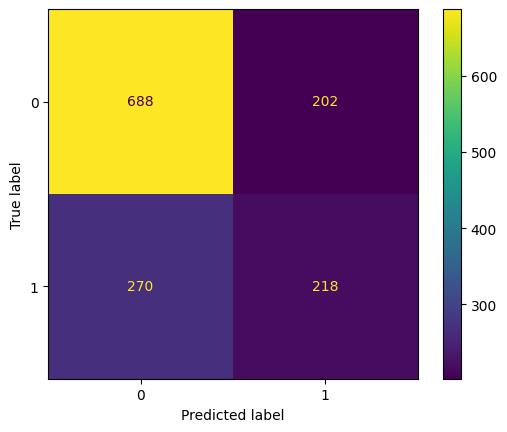

In [9]:
# Generate predictions with the best model
y_pred = rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();
tn, fp, fn, tp = cm.ravel()

fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)

print('False Positive Rate:', fpr)
print('True Positive Rate:', tpr)
print('True Negative Rate:', tnr)
print('False Negative Rate:', fnr)

# Results are here

In [10]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)



Accuracy: 0.6574746008708273
Precision: 0.5190476190476191
Recall: 0.44672131147540983


Accuracy: Accuracy is the proportion of correct predictions made by the classifier out of all the predictions made. It is calculated as the ratio of the number of correctly classified instances to the total number of instances.

Precision: Precision is the proportion of true positives (correctly predicted positive instances) out of all the instances predicted as positive (true positives plus false positives). It is a measure of the classifier's ability to avoid false positives.

Recall: Recall is the proportion of true positives (correctly predicted positive instances) out of all the actual positive instances (true positives plus false negatives). It is a measure of the classifier's ability to find all the positive instances.

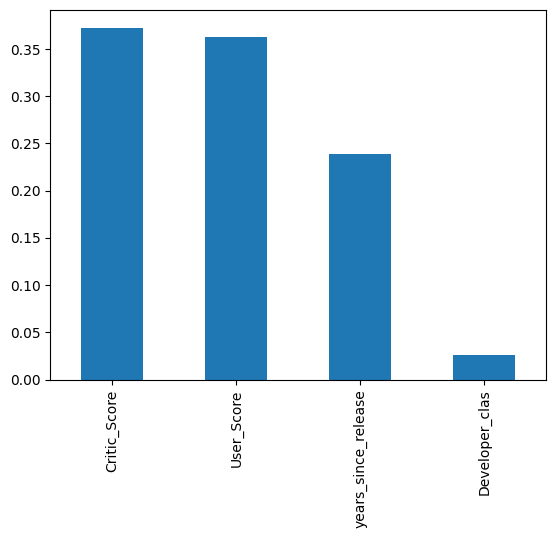

In [11]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

# Using GridSearch

In [12]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [13]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [14]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.7213390966395887


In [15]:
best_rf = RandomForestClassifier(**grid_search.best_params_)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7053701015965167


# Taking User_Score as Response Variable

In [16]:
# Split the data into features (X) and target (y)
x1 = df['Global_Sales']
x2 = df['years_since_release']
x3 = df['Developer_clas']
x4 = df['Critic_Score']
X = pd.concat([x1, x2, x3, x4], axis = 1).reindex(x1.index) 
y = df['New_User_Score']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7431059506531205


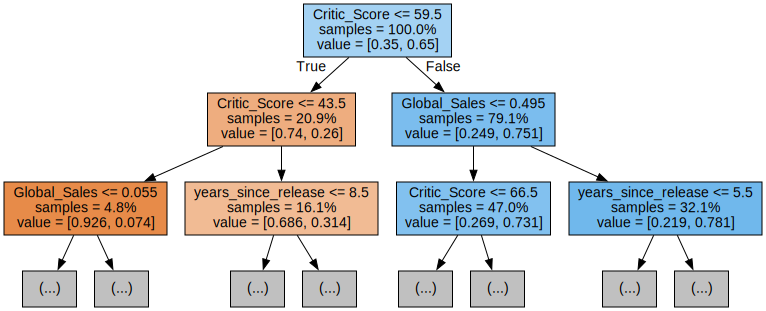

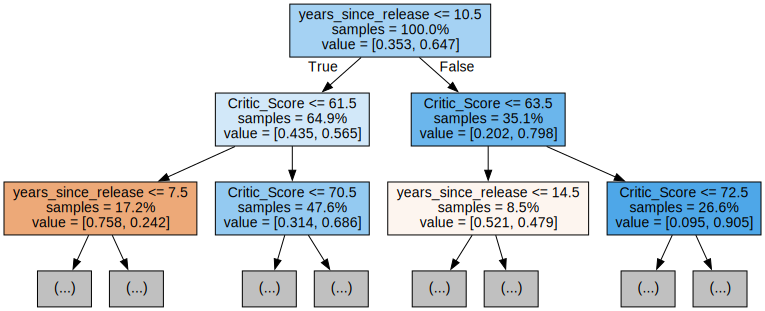

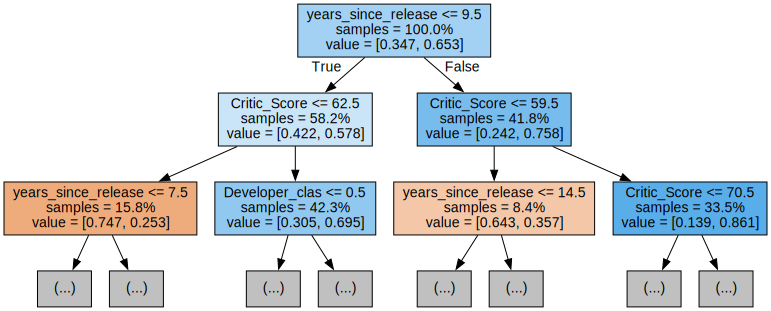

In [17]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

False Positive Rate: 0.437219730941704
True Positive Rate: 0.8293991416309013
True Negative Rate: 0.5627802690582959
False Negative Rate: 0.17060085836909872


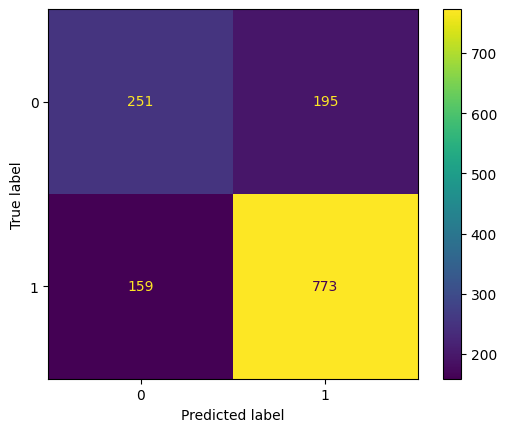

In [18]:
# Generate predictions with the best model
y_pred = rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();
tn, fp, fn, tp = cm.ravel()

fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)

print('False Positive Rate:', fpr)
print('True Positive Rate:', tpr)
print('True Negative Rate:', tnr)
print('False Negative Rate:', fnr)

# Results

In [19]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)



Accuracy: 0.7431059506531205
Precision: 0.7985537190082644
Recall: 0.8293991416309013


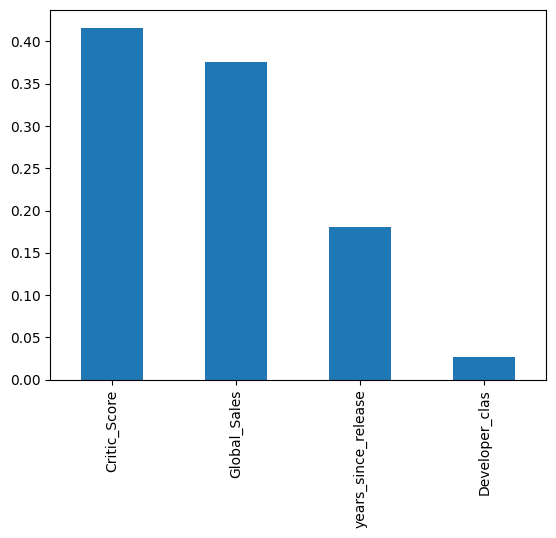

In [20]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

# Using Grid Search to tune Hyperparameters



In [21]:
param_grid = {
    'n_estimators': [5, 10, 50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [22]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 50, 100]})

In [23]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Best score: 0.7523592643722038


In [24]:
best_rf = RandomForestClassifier(**grid_search.best_params_)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7822931785195936


In [25]:
#Accuracy increased

# Ensemble Learning

In [26]:
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [27]:
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7728592162554426

In [28]:
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7808417997097242

In [29]:
#Shows that the random forest is fairly optimised